Продолжим обработку данных с Твиттера. 

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'. 
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().
 
2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'.
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

pd.set_option("display.max_columns", 100)
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SEED = 42

In [3]:
df = pd.read_pickle('./data/combined_tweets.pkl')
df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cant use cause they don...,"[thanks, for, lyft, credit, cant, use, cause, ...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...","[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in y...,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]","[model, love, take, time]","[model, love, take, time]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [4]:
def series_to_bag(data: pd.Series, vectorizer='count') -> pd.DataFrame:
    if vectorizer == 'count':
        vec = CountVectorizer(stop_words='english', 
                              max_features=1000, 
                              max_df=0.9, 
                              analyzer=lambda x: x) # отключаем анализатор, чтобы скормить списки
    elif vectorizer == 'tfidf':
        vec = TfidfVectorizer(stop_words='english', 
                              max_features=1000, 
                              max_df=0.9, 
                              analyzer=lambda x: x)
    else:
        raise ValueError("Unknown vectorizer")
    
    bag = vec.fit_transform(data)
    
    return pd.DataFrame(bag.toarray(), columns=vec.get_feature_names())

In [5]:
stemmed_count_vec = series_to_bag(df['tweet_stemmed'], vectorizer='count')
lemmatized_count_vec = series_to_bag(df['tweet_lemmatized'], vectorizer='count')

In [6]:
stemmed_count_vec.head(5)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aint,aist,album,aliv,allahsoil,allow,almost,alon,along,alreadi,also,altwaystoh,alway,amaz,america,american,amp,angel,angri,anim,anniversari,announc,anoth,anxieti,anymor,anyon,anyth,app,appl,appreci,arent,around,...,weekend,welcom,well,went,wet,weve,what,whatev,white,who,whole,wife,win,wine,winner,wish,without,woh,woman,women,wonder,wont,word,work,workout,world,worri,worst,would,wow,write,wrong,xx,xxx,yall,yay,ye,yeah,year,yesterday,yet,yo,yoga,york,young,your,youtub,youv,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
lemmatized_count_vec.head(5)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aint,aist,album,alive,allahsoil,almost,alone,along,already,also,altwaystoheal,always,amazing,america,american,amp,angry,animal,anniversary,another,anxiety,anymore,anyone,anything,app,apple,arent,around,arrived,as,ask,attack,available,award,...,well,went,wet,weve,whatever,whats,white,who,whole,wife,win,wine,winner,wish,wishing,without,woh,woman,wonder,wonderful,wont,word,work,working,workout,world,worry,worst,would,wow,writing,wrong,xx,xxx,yall,yay,yeah,year,yes,yesterday,yet,yo,yoga,york,young,youre,youtube,youve,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
lemmatized_count_vec.iloc[0].sum()

3

In [9]:
stemmed_tfidf_vec = series_to_bag(df['tweet_stemmed'], vectorizer='tfidf')
lemmatized_tfidf_vec = series_to_bag(df['tweet_lemmatized'], vectorizer='tfidf')

In [10]:
stemmed_tfidf_vec.head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aint,aist,album,aliv,allahsoil,allow,almost,alon,along,alreadi,also,altwaystoh,alway,amaz,america,american,amp,angel,angri,anim,anniversari,announc,anoth,anxieti,anymor,anyon,anyth,app,appl,appreci,arent,around,...,weekend,welcom,well,went,wet,weve,what,whatev,white,who,whole,wife,win,wine,winner,wish,without,woh,woman,women,wonder,wont,word,work,workout,world,worri,worst,would,wow,write,wrong,xx,xxx,yall,yay,ye,yeah,year,yesterday,yet,yo,yoga,york,young,your,youtub,youv,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
lemmatized_tfidf_vec.head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aint,aist,album,alive,allahsoil,almost,alone,along,already,also,altwaystoheal,always,amazing,america,american,amp,angry,animal,anniversary,another,anxiety,anymore,anyone,anything,app,apple,arent,around,arrived,as,ask,attack,available,award,...,well,went,wet,weve,whatever,whats,white,who,whole,wife,win,wine,winner,wish,wishing,without,woh,woman,wonder,wonderful,wont,word,work,working,workout,world,worry,worst,would,wow,writing,wrong,xx,xxx,yall,yay,yeah,year,yes,yesterday,yet,yo,yoga,york,young,youre,youtube,youve,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
lemmatized_tfidf_vec.iloc[0].sum()

1.716499965884256

___

3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [13]:
# Загружаем данные
data = open('./data/corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
corpus_df = pd.DataFrame({
    'text': texts,
    'label': labels
})

corpus_df['label'] = np.where(corpus_df['label'] == '__label__1', 0, 1)
corpus_df.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [14]:
corpus_df['label'].value_counts(normalize=True)

0    0.5097
1    0.4903
Name: label, dtype: float64

In [15]:
def predict_corpus(vector, corpus: pd.DataFrame, n_feat=1000, svd_f=False, svd_components=None) -> float:
    """
    Функция на вход принимает 
    vector: класс векторайзера(Counvectorizer или Tfidfvectorizer)
    corpus: датафрейм состоящий из 2х столбцов - текст и метка класса
    n_feat: количество фичей, которые векторайзер оставит на выходе (передается в атрибут max_features)
    svd_f: флаг применения алгоритма снижения размерности (в данном случае TruncatedSVD, так как PCA
    не умеет работать со sparse матрицами)
    svd_components: количество компонент, получаемых на выходе из алгоритма снижения размерности. 
    Должно быть меньше n_feat
    
    Возвращает метрику accuracy
    """
    # split
    train_x, valid_x, train_y, valid_y = train_test_split(corpus['text'], 
                                                      corpus['label'],
                                                     random_state=SEED)
    # инициализируем векторизатор
    vec = vector(stop_words='english', 
                 max_features=n_feat, 
                 max_df=0.9,
                 token_pattern=r'\w{1,}')

    # обучаем векторизатор
    vec.fit(corpus_df['text'])

    # Преобразуем токены в эмбедденги
    xtrain_count =  vec.transform(train_x)
    xvalid_count =  vec.transform(valid_x)

    if svd_f:
        svd = TruncatedSVD(n_components=svd_components)
        xtrain_count = svd.fit_transform(xtrain_count)
        xvalid_count = svd.transform(xvalid_count)
        
    # создаем классификатор
    classifier = LogisticRegression()
    # обучаем классификатор
    classifier.fit(xtrain_count, train_y)
    # получаем предикты
    predictions = classifier.predict(xvalid_count)
    
    # возвращаем скор
    return accuracy_score(valid_y, predictions)

In [16]:
vec_list = [CountVectorizer, TfidfVectorizer]
features = np.arange(100, 2100, 100)

In [17]:
result_list = []
for vec in vec_list:
    acc_list = []
    for feat in features:
        acc_list.append(predict_corpus(vec, corpus_df, n_feat=feat))
    result_list.append(acc_list)

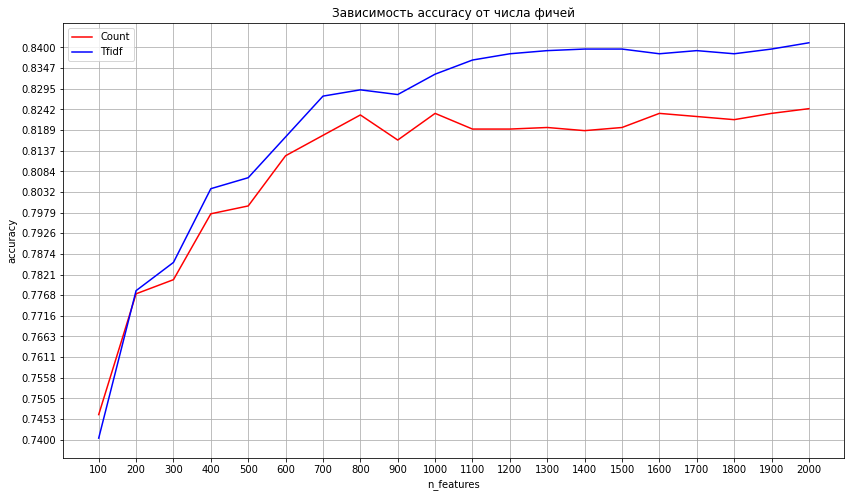

In [18]:
plt.figure(figsize=(14, 8))
plt.plot(features, result_list[0], color='red', label='Count')
plt.plot(features, result_list[1], color='blue', label='Tfidf')

plt.xlabel("n_features")
plt.ylabel("accuracy")
plt.title("Зависимость accuracy от числа фичей")
plt.xticks(np.arange(100, 2100, 100))
plt.yticks(np.linspace(0.74, 0.84, 20))
plt.legend(loc='best')
plt.grid()
plt.show()

In [22]:
components = np.linspace(20, 1980, 20).astype(int)
result_svd_list = []
for vec in vec_list:
    acc_list = []
    for comp in components:
        acc_list.append(predict_corpus(vec, corpus_df, n_feat=2000, svd_f=True, svd_components=comp))
    result_svd_list.append(acc_list)

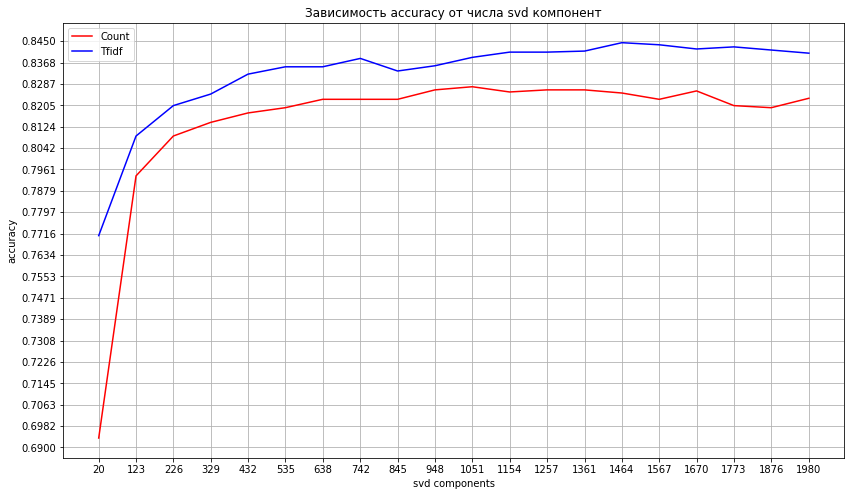

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(components, result_svd_list[0], color='red', label='Count')
plt.plot(components, result_svd_list[1], color='blue', label='Tfidf')

plt.xlabel("svd components")
plt.ylabel("accuracy")
plt.title("Зависимость accuracy от числа svd компонент")
plt.xticks(components)
plt.yticks(np.linspace(0.69, 0.845, 20))
plt.legend(loc='best')
plt.grid()
plt.show()

In [32]:
pd.DataFrame({
    'features': features,
    'count_vec': result_list[0],
    'tfidf_vec': result_list[1]
})

,features,count_vec,tfidf_vec
0,100,0.7464,0.7404
1,200,0.7772,0.7780
2,300,0.7808,0.7852
3,400,0.7976,0.8040
4,500,0.7996,0.8068
5,600,0.8124,0.8172
6,700,0.8176,0.8276
7,800,0.8228,0.8292
8,900,0.8164,0.8280
9,1000,0.8232,0.8332


In [31]:
pd.DataFrame({
    'components': components,
    'count_vec': result_svd_list[0],
    'tfidf_vec': result_svd_list[1]
})

,components,count_vec,tfidf_vec
0,20,0.6936,0.7708
1,123,0.7936,0.8088
2,226,0.8088,0.8204
3,329,0.8140,0.8248
4,432,0.8176,0.8324
5,535,0.8196,0.8352
6,638,0.8228,0.8352
7,742,0.8228,0.8384
8,845,0.8228,0.8336
9,948,0.8264,0.8356


### Выводы:

- tfidf vectorizer работает лучше чем count
- чем больше фичей мы оставляем в n_features тем лучшую метрику демонстрирует модель
- эта зависимость нелинейна, и после определенного значения рост метрики несущественен
- аналогичная ситуация с SVD. Можно достаточно серьезно снизить размерность векторов без значительного ухудшения метрик